In [1]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as snf

In [2]:
Airlines=pd.read_csv("C:\\Users\\Admin\\Downloads\\Airlines+Data.csv")
Airlines.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [3]:
Airlines.isnull().sum()
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

In [4]:
p=Airlines["Month"][0]
p[0:3]
Airlines["months"]=0
Airlines.head()

,Month,Passengers,months
0,Jan-95,112,0
1,Feb-95,118,0
2,Mar-95,132,0
3,Apr-95,129,0
4,May-95,121,0


In [5]:
for i in range(96):
    p=Airlines["Month"][i]
    Airlines["months"][i]=p[0:3]

<ipython-input-5-d62eeb441a77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airlines["months"][i]=p[0:3]
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
month_dummies=pd.DataFrame(pd.get_dummies(Airlines["months"]))
month_dummies=month_dummies.iloc[:,[4,3,7,0,8,6,5,1,11,10,9,2]]

In [7]:
month_dummies

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,1,0,0,0,0
92,0,0,0,0,0,0,0,0,1,0,0,0
93,0,0,0,0,0,0,0,0,0,1,0,0
94,0,0,0,0,0,0,0,0,0,0,1,0


In [7]:
Airlines1=pd.concat([Airlines,month_dummies],axis=1)
Airlines1["t"]=np.arange(1,97)
Airlines1["t_Squared"]=Airlines1["t"]*Airlines1["t"]
Airlines1["log_passengers"]=np.log(Airlines["Passengers"])


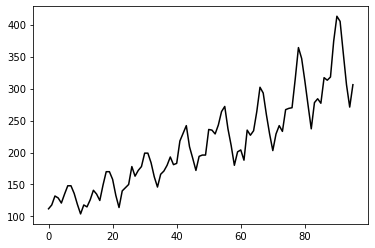

In [8]:
Airlines1.Passengers.plot(style="k")

In [9]:
Train=Airlines1.head(80)
Test=Airlines1.tail(16)
Test=Test.set_index(np.arange(1,17))

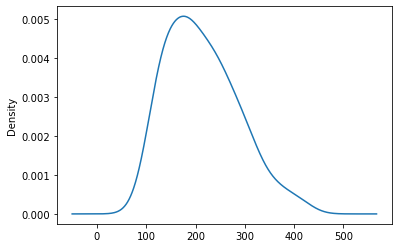

In [10]:
Airlines1.Passengers.plot(kind='kde')

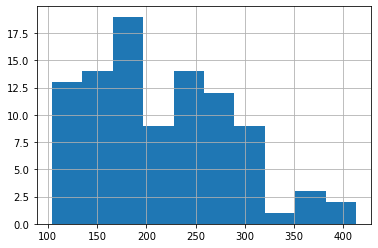

In [11]:
Airlines1.Passengers.hist()

In [12]:
Train=Airlines1.head(80)
Test=Airlines1.tail(16)
Test=Test.set_index(np.arange(1,17))

In [22]:
Lin_model=snf.ols("Passengers~t",data=Train).fit()
Lin_pred=pd.Series(Lin_model.predict(pd.DataFrame(Test["t"])))
Lin_rmse=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(Lin_pred))**2)) 
Lin_rmse

47.542624067726805

In [23]:
Exp_model=snf.ols("log_passengers~t",data=Train).fit()
Exp_pred=pd.Series(Exp_model.predict(pd.DataFrame(Test["t"])))
Exp_rmse=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(np.exp(Exp_pred)))**2))
Exp_rmse

43.79373939334308

In [24]:
Quad_model=snf.ols("Passengers~t+t_Squared",data=Train).fit()
Quad_pred=pd.Series(Quad_model.predict(pd.DataFrame(Test[["t","t_Squared"]])))
Quad_rmse=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(Quad_pred))**2))
Quad_rmse

43.65440369584248

In [25]:
Add_sea=snf.ols("Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=Train).fit() 
Add_sea_pred=pd.Series(Add_sea.predict(Test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]]))
Add_sea_rmse=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(Add_sea_pred))**2))
Add_sea_rmse

129.26647641443296

In [26]:
Add_sea_Quad=snf.ols("Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec+t+t_Squared",data=Train).fit() 
Add_sea_Quad_pred=pd.Series(Add_sea_Quad.predict(Test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","t","t_Squared"]]))
Add_sea_Quad_rmse=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(Add_sea_Quad_pred))**2))
Add_sea_Quad_rmse

23.910983570091076

In [27]:
Mul_ad_sea=snf.ols("log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=Train).fit()
Mul_ad_sea_pred=pd.Series(Mul_ad_sea.predict(Test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]]))
Mul_ad_rmse=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(np.exp(Mul_ad_sea_pred)))**2))
Mul_ad_rmse

135.3264841462105

In [28]:
Mul_ad_Quad_sea=snf.ols("log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec+t+t_Squared",data=Train).fit()
Mul_ad_Quad_sea_pred=pd.Series(Mul_ad_Quad_sea.predict(Test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","t","t_Squared"]]))
Mul_ad_sea_rmse=np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(np.exp(Mul_ad_Quad_sea_pred)))**2))
Mul_ad_sea_rmse

23.086348545959265

In [29]:
data = {"MODEL":pd.Series(["Lin_rmse","Exp_rmse","Quad_rmse","Add_sea_rmse","Add_sea_Quad_rmse","Mul_ad_rmse","Mul_ad_sea_rmse"]),"RMSE_Values":pd.Series([Lin_rmse,Exp_rmse,Quad_rmse,Add_sea_rmse,Add_sea_Quad_rmse,Mul_ad_rmse,Mul_ad_sea_rmse])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,Lin_rmse,47.542624
1,Exp_rmse,43.793739
2,Quad_rmse,43.654404
3,Add_sea_rmse,129.266476
4,Add_sea_Quad_rmse,23.910984
5,Mul_ad_rmse,135.326484
6,Mul_ad_sea_rmse,23.086349


In [30]:
model_final=snf.ols("log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec+t+t_Squared",data=Airlines1).fit()
model_final